In [138]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [139]:
df = pd.read_csv('./data/training_series.csv')
data = df['Close'].array

In [140]:
df

,Year,Month,Date,Open,High,Low,Close,Adj Close,Volume
0,2017,1,3,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3770530000
1,2017,1,4,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3764890000
2,2017,1,5,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3761820000
3,2017,1,6,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3339890000
4,2017,1,9,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3217610000
...,...,...,...,...,...,...,...,...,...
1242,2021,12,8,4690.859863,4705.060059,4674.520020,4701.209961,4701.209961,3061550000
1243,2021,12,9,4691.000000,4695.259766,4665.979980,4667.450195,4667.450195,2851660000
1244,2021,12,10,4687.640137,4713.569824,4670.240234,4712.020020,4712.020020,2858310000
1245,2021,12,13,4710.299805,4710.299805,4667.600098,4668.970215,4668.970215,3322050000


In [141]:
date = pd.concat([df["Year"], df["Month"], df["Date"]],axis=1)
date.columns = ['year', 'month', 'day']
date = pd.to_datetime(date).astype(int)/ 10**9

/var/folders/ws/sp1qfps14rj2wpf5_71gh44m0000gn/T/ipykernel_930/2496403623.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  date = pd.to_datetime(date).astype(int)/ 10**9


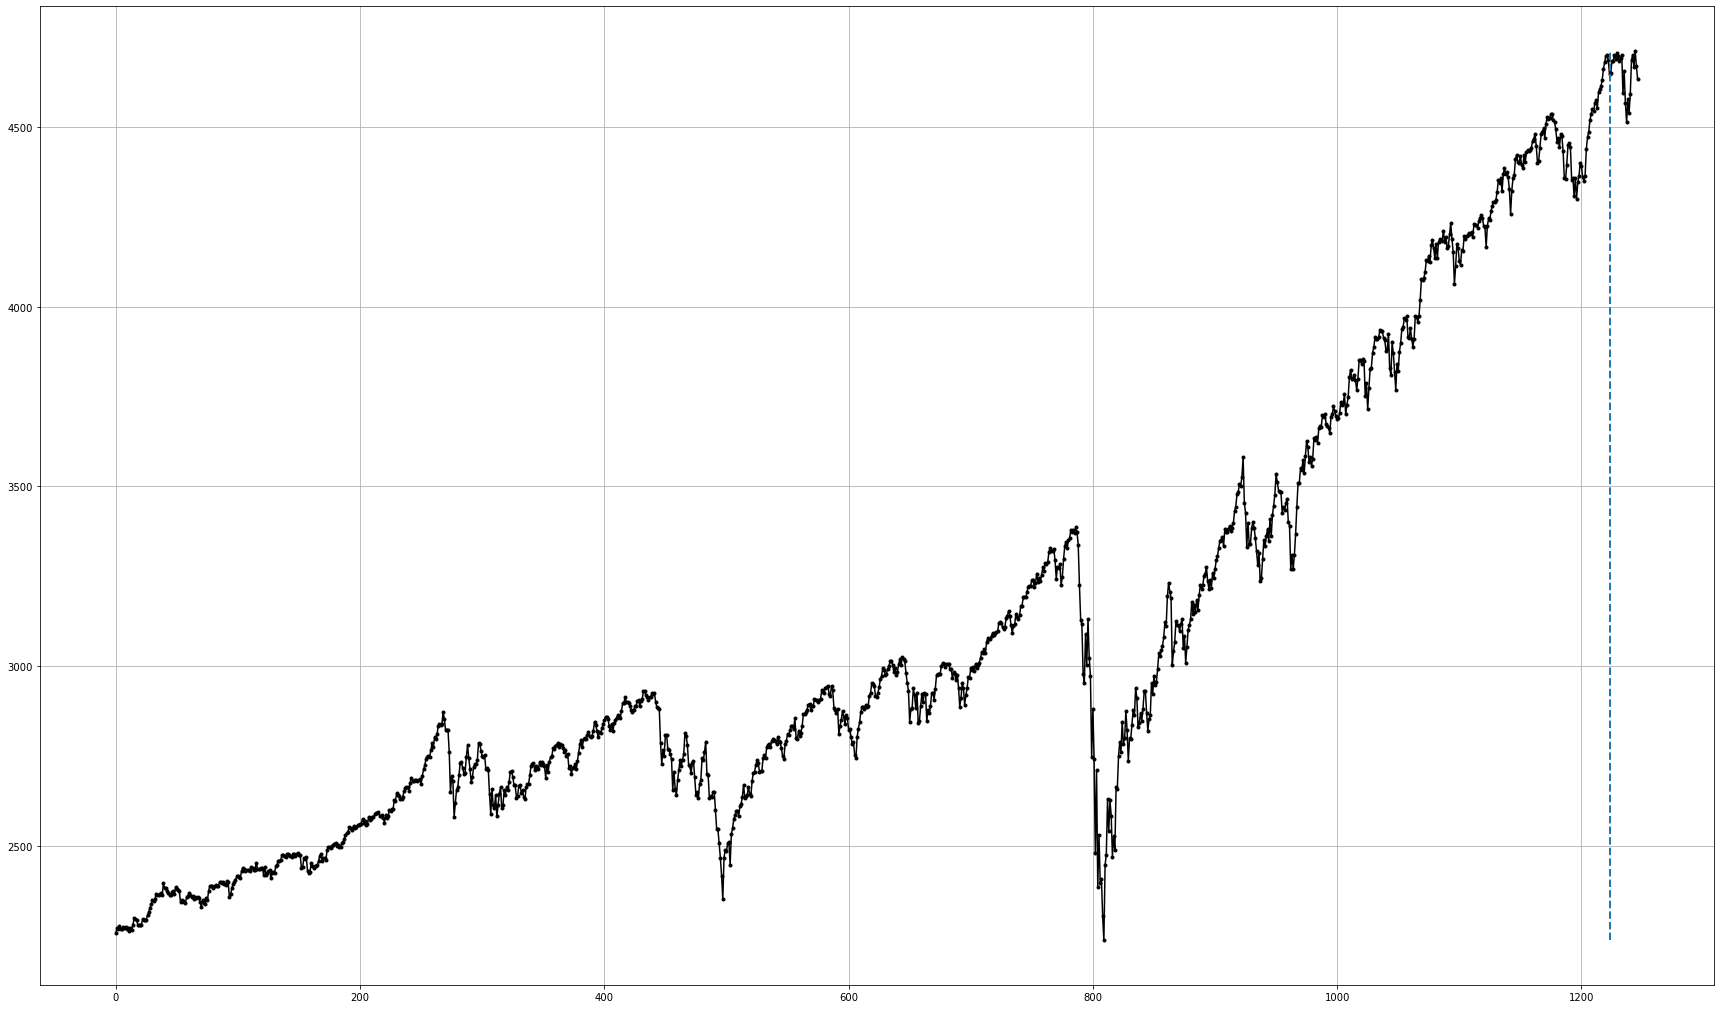

In [142]:
plt.figure(figsize=(30, 18))
plt.plot(data, ".-k")
plt.grid()

# linea vertical para dividir el entrenamiento
# del pronóstico
plt.plot(
    [len(data) - 24, len(data) - 24],
    [min(data), max(data)],
    "--",
    linewidth=2);

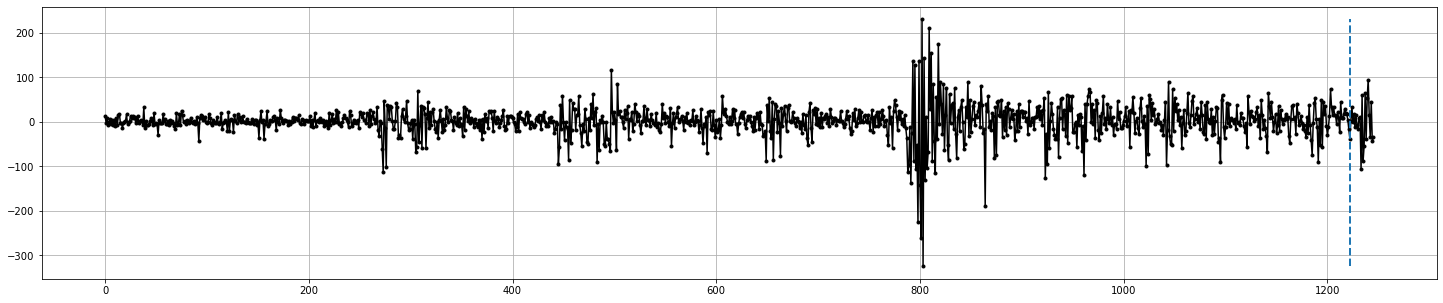

In [143]:
# Se remueve la tendencia
data_d1 = [data[t] - data[t - 1] for t in range(1, len(data))]

# En la gráfica queda la componente cíclica
plt.figure(figsize=(25, 5))
plt.plot(data_d1, ".-k")
plt.grid()
plt.plot(
    [len(data_d1) - 24, len(data_d1) - 24],
    [min(data_d1), max(data_d1)],
    "--",
    linewidth=2,
);

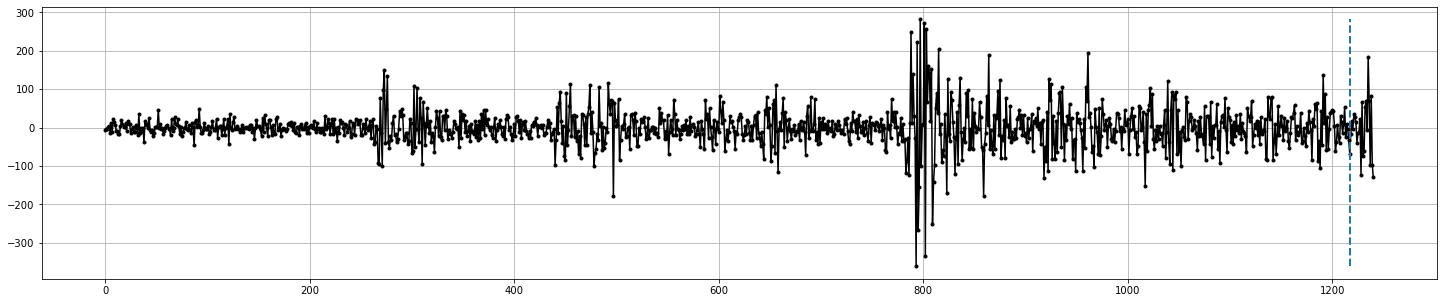

In [144]:
#
# Se remueve la componente cíclica
# restando z[t] - z[t-12]
#
data_d1d5 = [data_d1[t] - data_d1[t - 5] for t in range(5, len(data_d1))]

plt.figure(figsize=(25, 5))
plt.plot(data_d1d5, ".-k")
plt.grid()
plt.plot(
    [len(data_d1d5) - 24, len(data_d1d5) - 24],
    [min(data_d1d5), max(data_d1d5)],
    "--",
    linewidth=2,
);

In [145]:
len(data_d1d5)

1241

In [146]:
#
# Se escalan los valores como en el caso anaterior
#
scaler = MinMaxScaler()
data_d1d5_scaled = scaler.fit_transform(np.array(data_d1d5).reshape(-1, 1))
data_d1d5_scaled = [u[0] for u in data_d1d5_scaled]

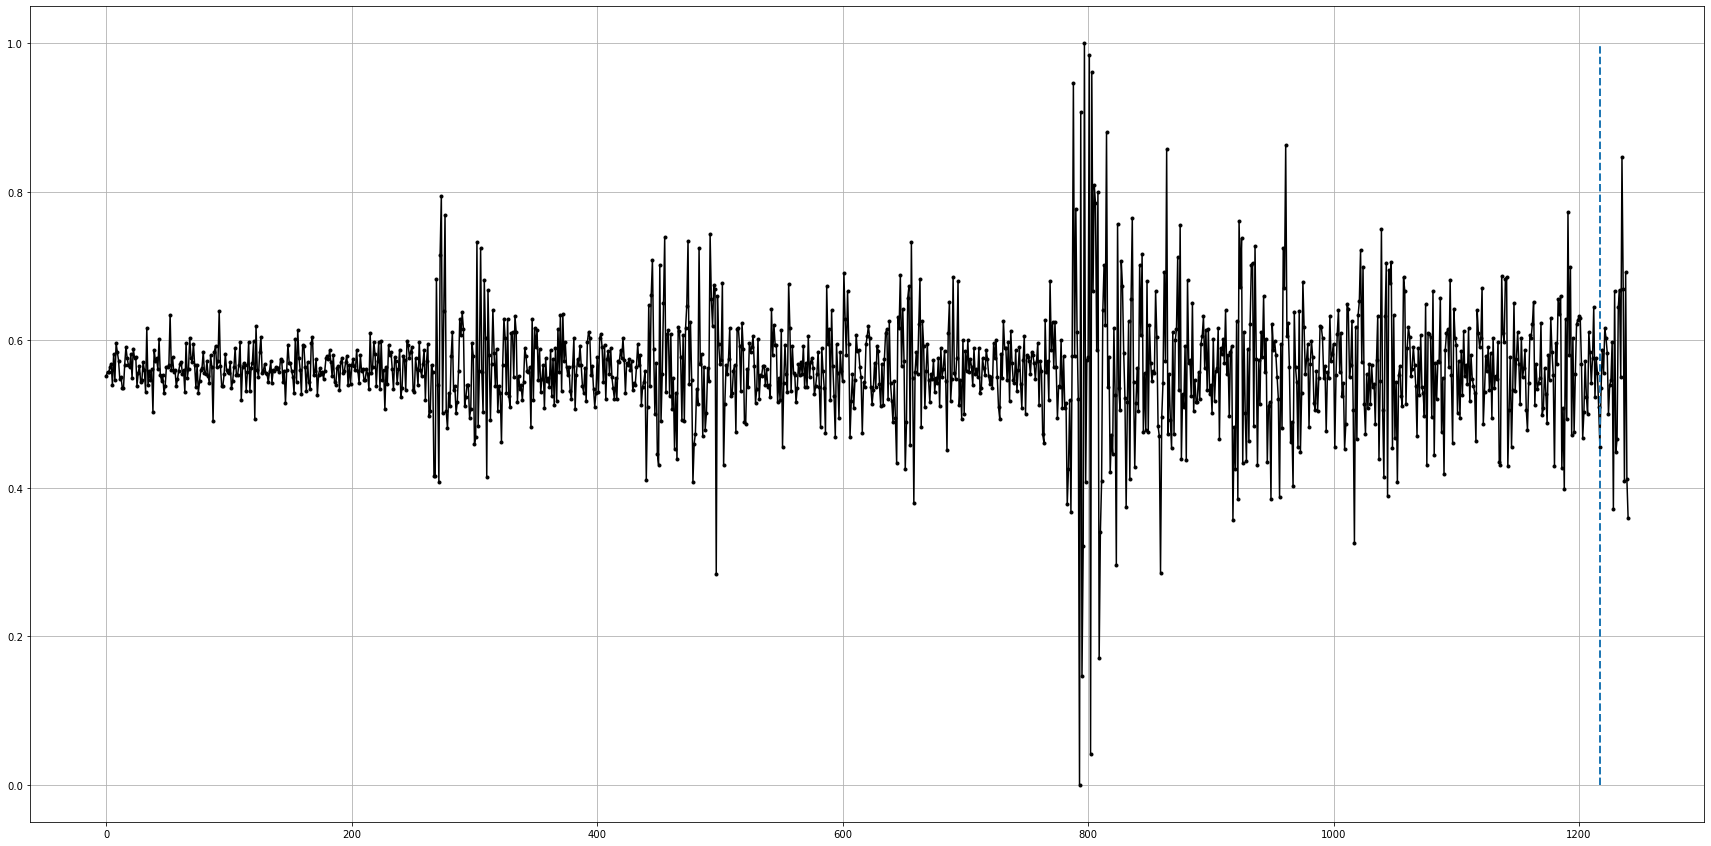

In [147]:
#
# Se verifica visualmente el escalamiento
#
plt.figure(figsize=(30, 15))
plt.plot(data_d1d5_scaled, ".-k")
plt.grid()
plt.plot(
    [len(data_d1d5_scaled) - 24, len(data_d1d5_scaled) - 24],
    [min(data_d1d5_scaled), max(data_d1d5_scaled)],
    "--",
    linewidth=2,
);

In [148]:
len(data_d1d5_scaled)

1241

In [149]:
#
# Se construye la matriz de regresores
#
P = 5

X = []
for t in range(P - 1, len(data_d1d5_scaled) - 1):
    X.append([data_d1d5_scaled[t - n] for n in range(P)])

d = data_d1d5_scaled[P:]

In [150]:
# Ver si se debe borrar
# Se construye la matriz de regresores
#

P = 5

Xt = []
dateeee = date[6:].values
for t in range(P - 1, len(dateeee) - 1):
    Xt.append([dateeee[t - n] for n in range(P)])

In [151]:
len(Xt)

1236

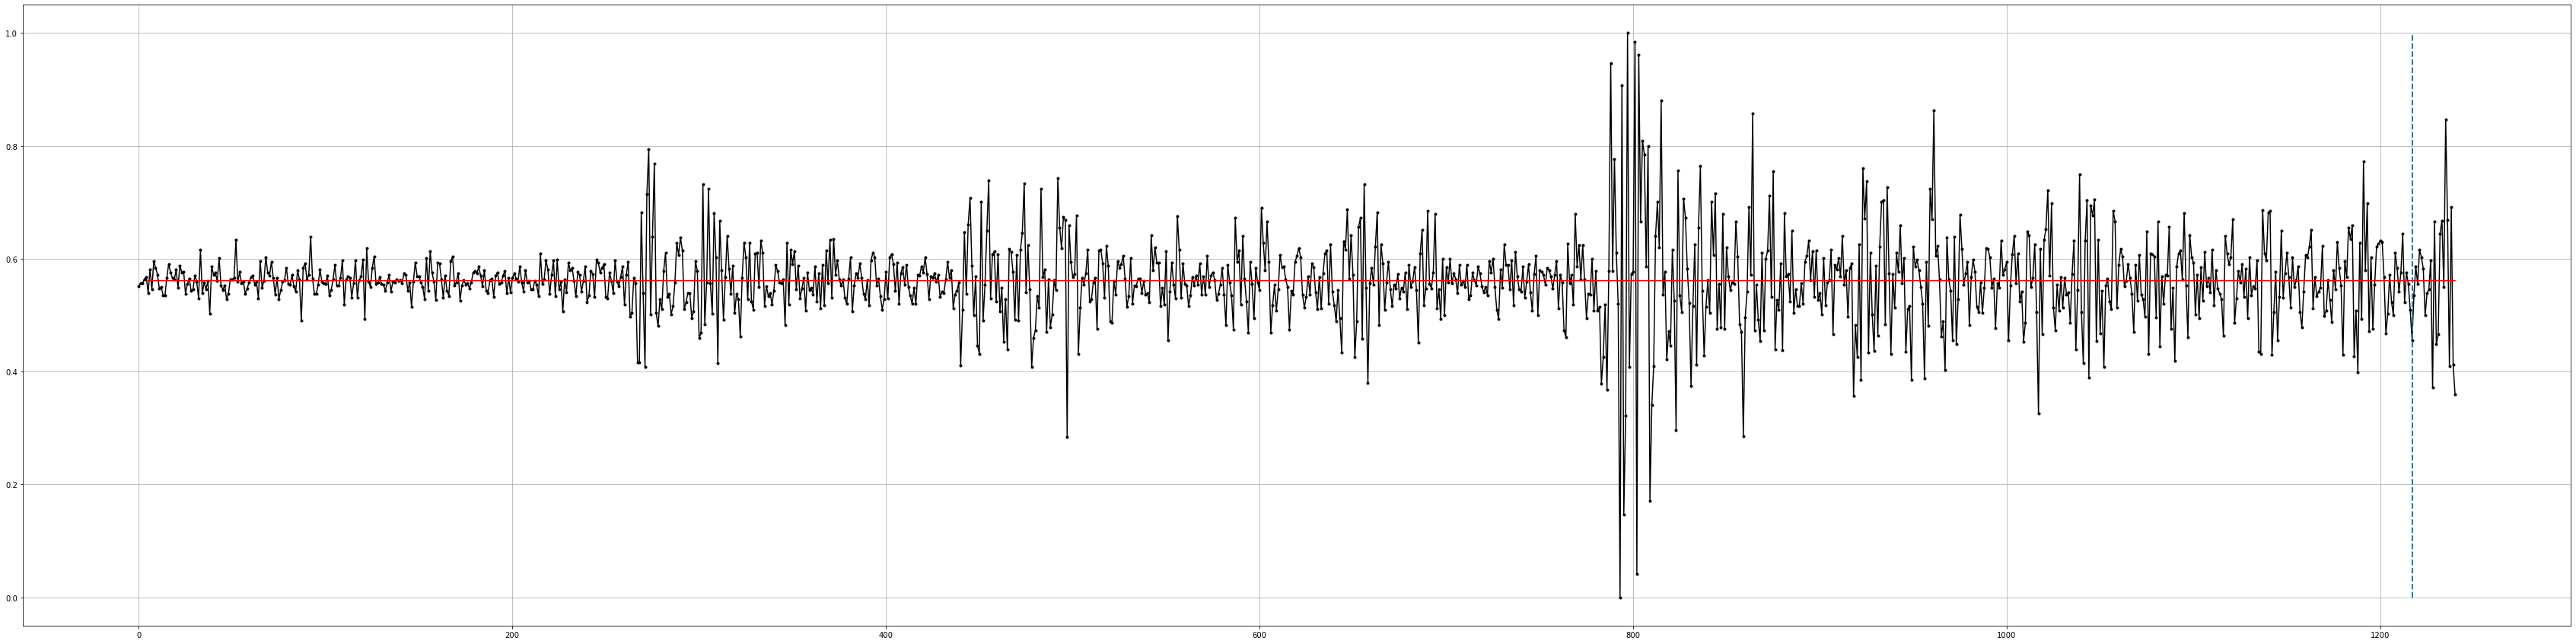

In [152]:
H = 1  # Se escoge arbitrariamente

np.random.seed(123456)

mlp = MLPRegressor(
    hidden_layer_sizes=(H,),
    activation="logistic",
    learning_rate="adaptive",
    momentum=0.0,
    learning_rate_init=0.002,
    max_iter=100000,
)

# Entrenamiento
mlp.fit(Xt[0:998], data_d1d5_scaled[0:998])

# Pronostico
y_d1d5_scaled_m2 = mlp.predict(Xt)

plt.figure(figsize=(60, 15))
plt.plot(data_d1d5_scaled, ".-k")
plt.grid()

# No hay pronóstico para los primeros 5 valores de la serie
plt.plot([None] * P + y_d1d5_scaled_m2.tolist(), "-r")

# linea vertical para dividir el entrenamiento
# del pronóstico
plt.plot(
    [len(data_d1d5_scaled) - 24, len(data_d1d5_scaled) - 24],
    [min(data_d1d5_scaled), max(data_d1d5_scaled)],
    "--",
    linewidth=2,
);

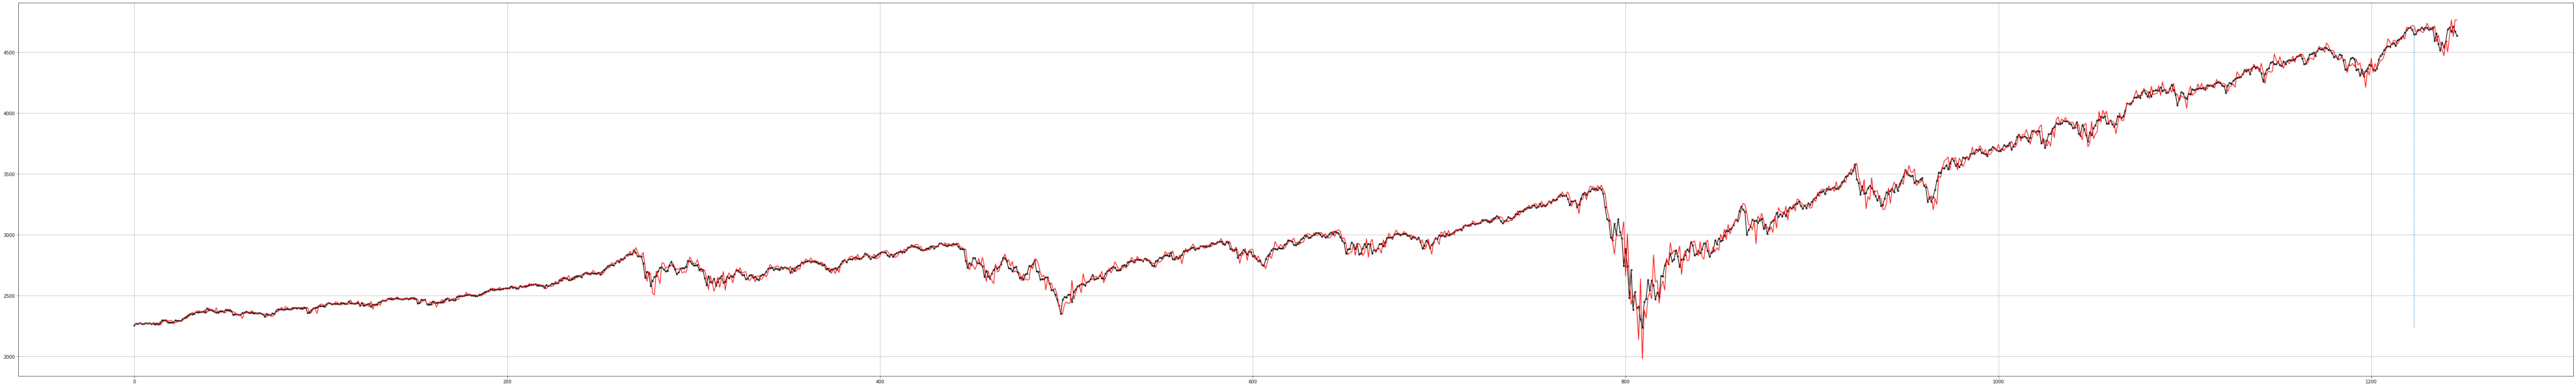

In [153]:
y_d1d5_scaled_m2 = data_d1d5_scaled[0:P] + y_d1d5_scaled_m2.tolist()

y_d1d5_m2 = scaler.inverse_transform([[u] for u in y_d1d5_scaled_m2])
y_d1d5_m2 = [u[0] for u in y_d1d5_m2.tolist()]

y_d1_m2 = [y_d1d5_m2[t] + data_d1[t] for t in range(len(y_d1d5_m2))]
y_d1_m2 = data_d1[0:5] + y_d1_m2

y_m2 = [y_d1_m2[t] + data[t] for t in range(len(y_d1_m2))]

y_m2 = [data[0]] + y_m2
plt.figure(figsize=(100, 15))
plt.plot(data, ".-k")
plt.grid()

plt.plot(y_m2, "-r")

# linea vertical para dividir el entrenamiento
# del pronóstico. Se ubica en el ultimo dato
# usando para entrenamiento
plt.plot([len(data) - 24, len(data) - 24], [min(data), max(data)], "--", linewidth=1);

In [235]:
#Prediccion de serie futura

In [242]:
df_to_predict = pd.read_csv('./data/test_series.csv')

In [243]:
date_to_predict = pd.concat([df_to_predict["Year"], df_to_predict["Month"], df_to_predict["Date"]],axis=1)
date_to_predict.columns = ['year', 'month', 'day']


In [244]:
date_to_predict

,year,month,day
0,2021,12,16
1,2021,12,17
2,2021,12,20
3,2021,12,21
4,2021,12,22
5,2021,12,23
6,2021,12,24
7,2021,12,27
8,2021,12,28
9,2021,12,29


In [245]:
date_to_predict = pd.to_datetime(date_to_predict).astype(int)/ 10**9

/var/folders/ws/sp1qfps14rj2wpf5_71gh44m0000gn/T/ipykernel_930/2503210136.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  date_to_predict = pd.to_datetime(date_to_predict).astype(int)/ 10**9


In [246]:
P = 5

Xt_predict = []
date_to_predictttt = date_to_predict.values
for t in range(1, len(date_to_predictttt)):
    Xt_predict.append([date_to_predictttt[t - n] for n in range(P)])

In [247]:
predicted_xt = mlp.predict(Xt_predict)

In [248]:
data_d1_1= data_d1[-16:]

In [249]:
data_1 = data[-16:]

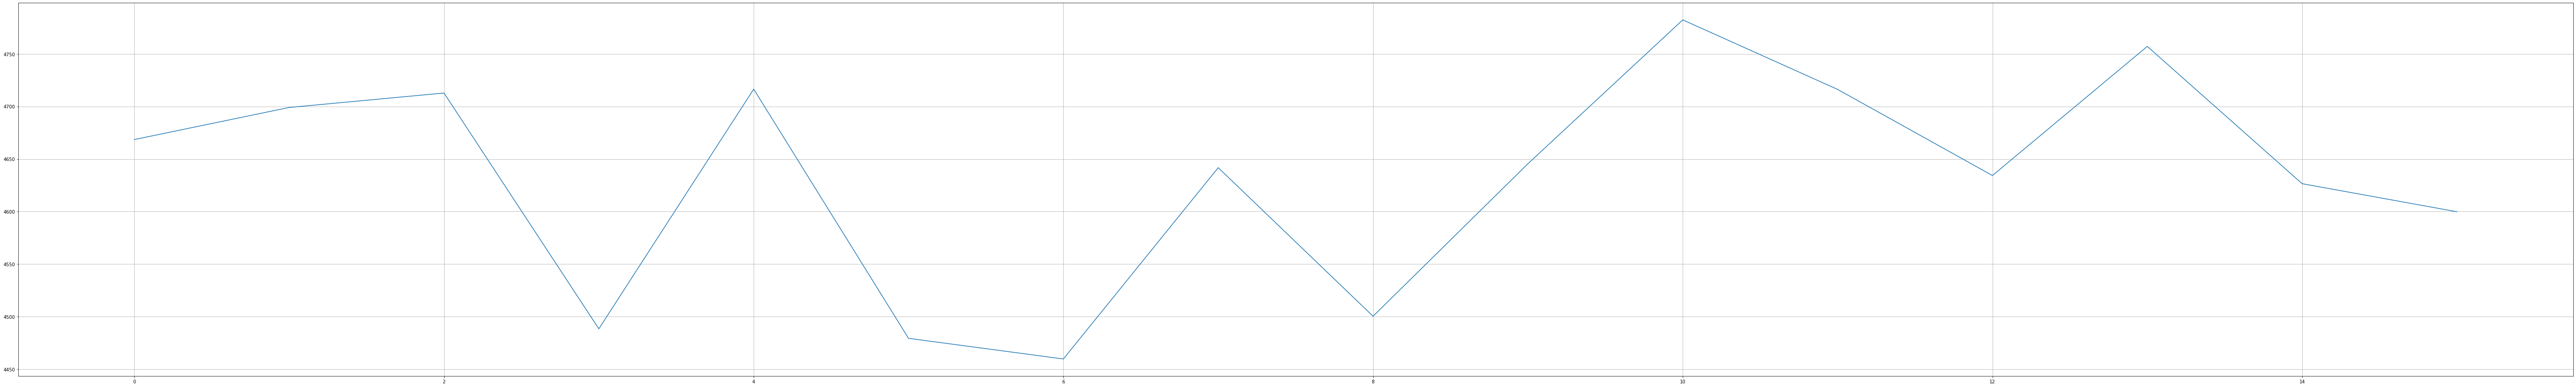

In [250]:
y_d1d5_scaled_m2_1 = predicted_xt.tolist()

y_d1d5_m2_1 = y_d1d5_scaled_m2_1

y_d1_m2_1 = [y_d1d5_scaled_m2_1[t] + data_d1_1[t] for t in range(len(y_d1d5_scaled_m2_1))]
y_d1_m2_1 = y_d1_m2_1

y_m2_1 = [y_d1_m2_1[t] + data_1[t] for t in range(len(y_d1_m2_1))]

plt.figure(figsize=(100, 15))
#plt.plot(data, ".-k")
plt.grid()

plt.plot(y_m2_1)

In [251]:
y_m2_1

[4668.481239939877,
 4699.021767283627,
 4712.781044627377,
 4488.341591502377,
 4716.481239939877,
 4479.291298533627,
 4459.641396189877,
 4641.721474314877,
 4500.321571971127,
 4645.470986033627,
 4782.391396189877,
 4716.231239939877,
 4634.251747752377,
 4757.151161814877,
 4626.481728221127,
 4599.770790721127]